# **Laboratorio 1**

**Integrantes**:
- Monserrath Morales
- Alonso Maurel

#**1) CARGAR Y PREPROCESAMIENTO DE DATAS**

In [ ]:
# CARGAR DATAFRAMES
import gdown
import zipfile
import pandas as pd
import os

# ID del archivo en Google Drive
file_id = '16_qXBADX0iNhz86ARff4sXUySDDrj9jH'
zip_filename = 'Egresados 2015-2020 y Titulados 2022.zip'

# Descargar el archivo ZIP desde Google Drive
gdown.download(id=file_id, output=zip_filename, quiet=False)

# Carpeta donde se extraer√° el contenido
extract_folder = 'datos_egresados'
os.makedirs(extract_folder, exist_ok=True)

# Extraer el ZIP
with zipfile.ZipFile(zip_filename, 'r') as zip_ref:
    zip_ref.extractall(extract_folder)

# Leer los CSV en DataFrames
df_2015 = pd.read_csv(f'{extract_folder}/Egresados 2015.csv', sep=';', encoding='utf-8')
df_2016 = pd.read_csv(f'{extract_folder}/Egresados 2016.csv', sep=';', encoding='utf-8')
df_2017 = pd.read_csv(f'{extract_folder}/Egresados 2017.csv', sep=';', encoding='utf-8')
df_2018 = pd.read_csv(f'{extract_folder}/Egresados 2018.csv', sep=';', encoding='utf-8')
df_2019 = pd.read_csv(f'{extract_folder}/Egresados 2019.csv', sep=';', encoding='utf-8')
df_2020 = pd.read_csv(f'{extract_folder}/Egresados 2020.csv', sep=';', encoding='utf-8')
df_titulados = pd.read_csv(f'{extract_folder}/Titulados 2022.csv', sep=';', encoding='utf-8')

Downloading...
From (original): https://drive.google.com/uc?id=16_qXBADX0iNhz86ARff4sXUySDDrj9jH
From (redirected): https://drive.google.com/uc?id=16_qXBADX0iNhz86ARff4sXUySDDrj9jH&confirm=t&uuid=60c03c58-5711-45a6-9c27-08bb024f7ef7
To: /content/Egresados 2015-2020 y Titulados 2022.zip
100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 101M/101M [00:02<00:00, 34.9MB/s] 
<ipython-input-1-f1744e03f103>:23: DtypeWarning: Columns (3,5,6,8,12,13,14) have mixed types. Specify dtype option on import or set low_memory=False.
  df_2015 = pd.read_csv(f'{extract_folder}/Egresados 2015.csv', sep=';', encoding='utf-8')
<ipython-input-1-f1744e03f103>:24: DtypeWarning: Columns (3,5,6,8,12,13,14) have mixed types. Specify dtype option on import or set low_memory=False.
  df_2016 = pd.read_csv(f'{extract_folder}/Egresados 2016.csv', sep=';', encoding='utf-8')
<ipython-input-1-f1744e03f103>:25: DtypeWarning: Columns (3,5,6,8,12,13,14) have mixed types. Specify dtype option on import or set low_memory=False.
  df_2017

In [ ]:
# UNIR DATAFRAMES EN UNO FINAL
df_notas = pd.concat([df_2015, df_2016, df_2017, df_2018, df_2019, df_2020], ignore_index=True)

# renombrar la columna MRUN a 'mrun' para que coincidan para hacer merge por 'mrun'
df_notas.rename(columns={'MRUN': 'mrun'}, inplace=True)

df_completo = pd.merge(df_notas, df_titulados, on='mrun', how='left')
df_completo.head()

AGNO    RBD DGV_RBD COD_REG_RBD NOM_REG_RBD_A COD_PRO_RBD COD_COM_RBD  \
0  2015   8505                  13            RM         131       13101   
1  2015  10126                  13            RM         131       13103   
2  2015  12716                  15           AYP         151       15101   
3  2015  12712                  15           AYP         151       15101   
4  2015   3247                   7         MAULE          74        7401   

   NOM_COM_RBD COD_DEPROV_RBD     NOM_DEPROV_RBD  ...  jornada  modalidad  \
0     SANTIAGO            131    SANTIAGO CENTRO  ...      NaN        NaN   
1  CERRO NAVIA            134  SANTIAGO PONIENTE  ...      NaN        NaN   
2        ARICA            151              ARICA  ...      NaN        NaN   
3        ARICA            151              ARICA  ...      NaN        NaN   
4      LINARES             73            LINARES  ...      NaN        NaN   

  version tipo_plan_carr area_cineunesco  area_cine_f_97 subarea_cine_f_97  \
0     NaN            NaN             NaN             NaN               NaN   
1     NaN            NaN             NaN             NaN               NaN   
2     NaN            NaN             NaN             NaN               NaN   
3     NaN            NaN             NaN             NaN               NaN   
4     NaN            NaN             NaN             NaN               NaN   

  area_cine_f_13 subarea_cine_f_13  area_carrera_generica_n  
0            NaN               NaN                      NaN  
1            NaN               NaN                      NaN  
2            NaN               NaN                      NaN  
3            NaN               NaN                      NaN  
4            NaN               NaN                      NaN  

[5 rows x 61 columns]

In [ ]:
print(df_completo.shape)

(5564181, 61)


In [ ]:
# SEPARAR EN COLUMNAS DE INTER√âS PARA UN AN√ÅLISIS M√ÅS COMODO Y SIMPLIFICADO
df_completo.columns

# crear columna con edad del alumno (√∫til para predicciones)
df_completo["anio_nacimiento"] = df_completo["fec_nac_alu"].astype(str).str[:4]
df_completo["anio_nacimiento"] = pd.to_numeric(df_completo["anio_nacimiento"], errors="coerce")
df_completo.loc[df_completo["anio_nacimiento"] == 1900, "anio_nacimiento"] = None
df_completo["edad_2022"] = 2022 - df_completo["anio_nacimiento"]

cols_interes = ['mrun','gen_alu','edad_2022','PROM_NOTAS_ALU','COD_DEPE2','RURAL_RBD','ENSE_COMPLETA',
                'tipo_inst_2','nivel_carrera_2','dur_total_carr','area_cineunesco','region_sede']
df_copy = df_completo[cols_interes]
df_copy.head()

mrun  gen_alu  edad_2022 PROM_NOTAS_ALU COD_DEPE2 RURAL_RBD  ENSE_COMPLETA  \
0    17      NaN        NaN              6         4         0              1   
1    18      NaN        NaN            5,6         5         0              1   
2    19      NaN        NaN            5,2         2         0              1   
3    20      NaN        NaN            4,7         2         0              1   
4    35      NaN        NaN            6,2         1         0              1   

  tipo_inst_2 nivel_carrera_2  dur_total_carr area_cineunesco region_sede  
0         NaN             NaN             NaN             NaN         NaN  
1         NaN             NaN             NaN             NaN         NaN  
2         NaN             NaN             NaN             NaN         NaN  
3         NaN             NaN             NaN             NaN         NaN  
4         NaN             NaN             NaN             NaN         NaN

In [ ]:
# CAMBIAR TIPOS DE DATOS A CORRESPONDIENTES
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5564181 entries, 0 to 5564180
Data columns (total 12 columns):
 #   Column           Dtype  
---  ------           -----  
 0   mrun             int64  
 1   gen_alu          float64
 2   edad_2022        float64
 3   PROM_NOTAS_ALU   object 
 4   COD_DEPE2        object 
 5   RURAL_RBD        object 
 6   ENSE_COMPLETA    int64  
 7   tipo_inst_2      object 
 8   nivel_carrera_2  object 
 9   dur_total_carr   float64
 10  area_cineunesco  object 
 11  region_sede      object 
dtypes: float64(3), int64(2), object(7)
memory usage: 509.4+ MB


In [ ]:
# Reemplazar comas por puntos en PROM_NOTAS_ALU y convertir a float
df_copy["PROM_NOTAS_ALU"] = df_copy["PROM_NOTAS_ALU"].str.replace(",", ".").astype(float)

# Convertir COD_DEPE2 y RURAL_RBD a integer
df_copy['COD_DEPE2'] = pd.to_numeric(df_copy['COD_DEPE2'], errors='coerce').astype('Int64')
df_copy['RURAL_RBD'] = pd.to_numeric(df_copy['RURAL_RBD'], errors='coerce').astype('Int64')

df_copy.info()

<ipython-input-4-8e6689e4707c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_copy["PROM_NOTAS_ALU"] = df_copy["PROM_NOTAS_ALU"].str.replace(",", ".").astype(float)
<ipython-input-4-8e6689e4707c>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_copy['COD_DEPE2'] = pd.to_numeric(df_copy['COD_DEPE2'], errors='coerce').astype('Int64')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5564181 entries, 0 to 5564180
Data columns (total 12 columns):
 #   Column           Dtype  
---  ------           -----  
 0   mrun             int64  
 1   gen_alu          float64
 2   edad_2022        float64
 3   PROM_NOTAS_ALU   float64
 4   COD_DEPE2        Int64  
 5   RURAL_RBD        Int64  
 6   ENSE_COMPLETA    int64  
 7   tipo_inst_2      object 
 8   nivel_carrera_2  object 
 9   dur_total_carr   float64
 10  area_cineunesco  object 
 11  region_sede      object 
dtypes: Int64(2), float64(4), int64(2), object(4)
memory usage: 520.0+ MB


<ipython-input-4-8e6689e4707c>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_copy['RURAL_RBD'] = pd.to_numeric(df_copy['RURAL_RBD'], errors='coerce').astype('Int64')


In [ ]:
# TRABAJAR NULOS SEG√öN EL CONTEXTO
print(df_copy.isnull().sum())

mrun                     0
gen_alu            5317426
edad_2022          5317426
PROM_NOTAS_ALU           0
COD_DEPE2              132
RURAL_RBD              132
ENSE_COMPLETA            0
tipo_inst_2        5317426
nivel_carrera_2    5317426
dur_total_carr     5317426
area_cineunesco    5317426
region_sede        5317426
dtype: int64


In [ ]:
import numpy as np

# eliminar 132 nulos de cols COD_DEPE2 y RURAL_RBD (al ser un num tan bajo comparado a los 5.5M valores no afecta el an√°lisis)
df_copy = df_copy.dropna(subset=['COD_DEPE2', 'RURAL_RBD'])

# columnas solo relevantes para titulados, asi que a estudiantes sin carrera terminada se les asigna etiquetas temporales
df_copy["nivel_carrera_2"].fillna("noPosee", inplace=True)
df_copy["tipo_inst_2"].fillna("sinInformacion", inplace=True)
df_copy["area_cineunesco"].fillna("sinInformacion", inplace=True)
df_copy["region_sede"].fillna("sinInformacion", inplace=True)
df_copy["dur_total_carr"].fillna(0, inplace=True)

# imputaci√≥n de genero aleatoria proporcional (ya que al ser demasiados nulos, hacerlo por la moda los valores se disparan)
prob_genero = df_copy["gen_alu"].dropna().value_counts(normalize=True)
df_copy.loc[df_copy["gen_alu"].isnull(), "gen_alu"] = np.random.choice(prob_genero.index, size=df_copy["gen_alu"].isnull().sum(), p=prob_genero.values)

# imputaci√≥n de edad siguiendo distribuci√≥n real de edades de los titulados de forma proporcional (no por la mediana porque genera sesgo)
edades_validas = df_copy['edad_2022'].dropna()
frecuencias = edades_validas.value_counts(normalize=True).sort_index() # obtener distribuci√≥n de frecuencias relativas

filtro = (df_copy['edad_2022'].isna()) & (df_copy['nivel_carrera_2'] == 'noPosee')

edades_imputadas = np.random.choice(
    frecuencias.index,             # posibles edades
    size=filtro.sum(),             # cu√°ntas imputar
    p=frecuencias.values           # probabilidades proporcionales
)
df_copy.loc[filtro, 'edad_2022'] = edades_imputadas

print(df_copy.isnull().sum())

<ipython-input-6-d8adbb8a4e5c>:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_copy["nivel_carrera_2"].fillna("noPosee", inplace=True)
<ipython-input-6-d8adbb8a4e5c>:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', 

mrun               0
gen_alu            0
edad_2022          0
PROM_NOTAS_ALU     0
COD_DEPE2          0
RURAL_RBD          0
ENSE_COMPLETA      0
tipo_inst_2        0
nivel_carrera_2    0
dur_total_carr     0
area_cineunesco    0
region_sede        0
dtype: int64


In [ ]:
# FILTRAR SOLO ESTUDIANTES CON ENSE√ëANZA MEDIA COMPLETA
df_final = df_copy[df_copy['ENSE_COMPLETA'] == 1]
df_final.head()

mrun  gen_alu  edad_2022  PROM_NOTAS_ALU  COD_DEPE2  RURAL_RBD  \
0    17      2.0       59.0             6.0          4          0   
1    18      2.0       23.0             5.6          5          0   
2    19      2.0       21.0             5.2          2          0   
3    20      1.0       21.0             4.7          2          0   
4    35      2.0       23.0             6.2          1          0   

   ENSE_COMPLETA     tipo_inst_2 nivel_carrera_2  dur_total_carr  \
0              1  sinInformacion         noPosee             0.0   
1              1  sinInformacion         noPosee             0.0   
2              1  sinInformacion         noPosee             0.0   
3              1  sinInformacion         noPosee             0.0   
4              1  sinInformacion         noPosee             0.0   

  area_cineunesco     region_sede  
0  sinInformacion  sinInformacion  
1  sinInformacion  sinInformacion  
2  sinInformacion  sinInformacion  
3  sinInformacion  sinInformacion  
4  sinInformacion  sinInformacion

In [ ]:
df_copy.shape

(5564049, 12)

In [ ]:
df_final.shape

(5308121, 12)

#**2) GRAFICOS EDA E INTERPRETACI√ìN DE RESULTADOS**

#2.1) GR√ÅFICOS CON TODOS LOS ESTUDIANTES DEL DATA

**Hip√≥tesis 1:** Son m√°s los hombres que estudiaron que las mujeres por diferencia

**Hip√≥tesis 2:** Las personas que no poseen titulo en el rango de (2015-2020) deberian ser m√°s que todos los estudiantes titulados del 2022

**Hip√≥tesis 3:** Los estudiantes mayores tienen carreras de una duraci√≥n m√°s larga.

1.   PARA VARIABLES NUM√âRICAS

ver c√≥mo est√°n distribuidos los valores en notas, duraci√≥n de estudios y g√©nero:

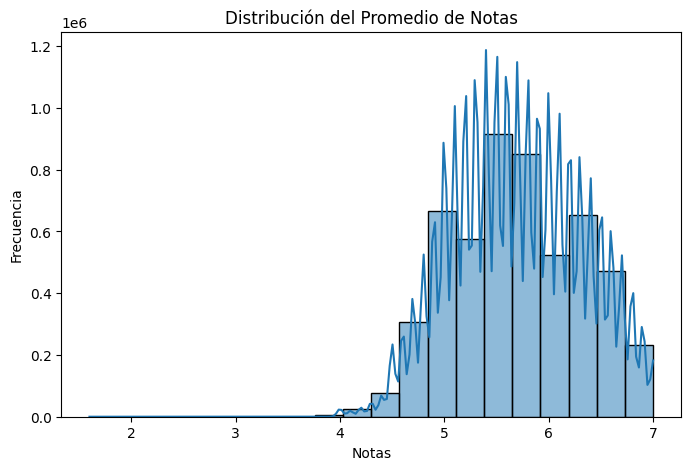

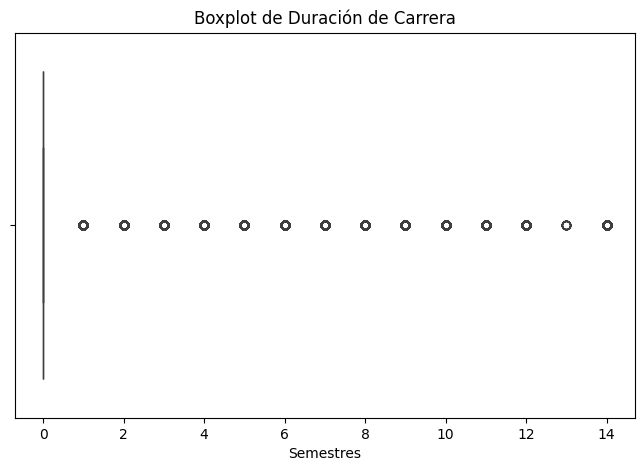

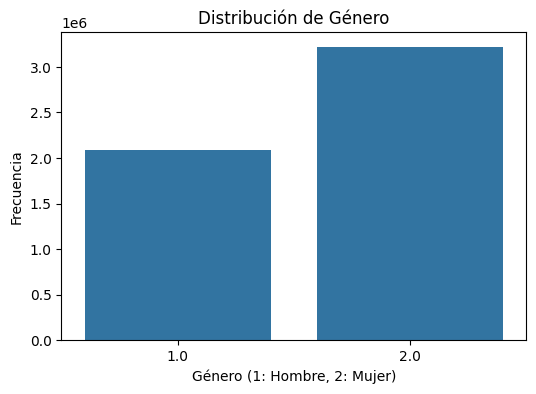

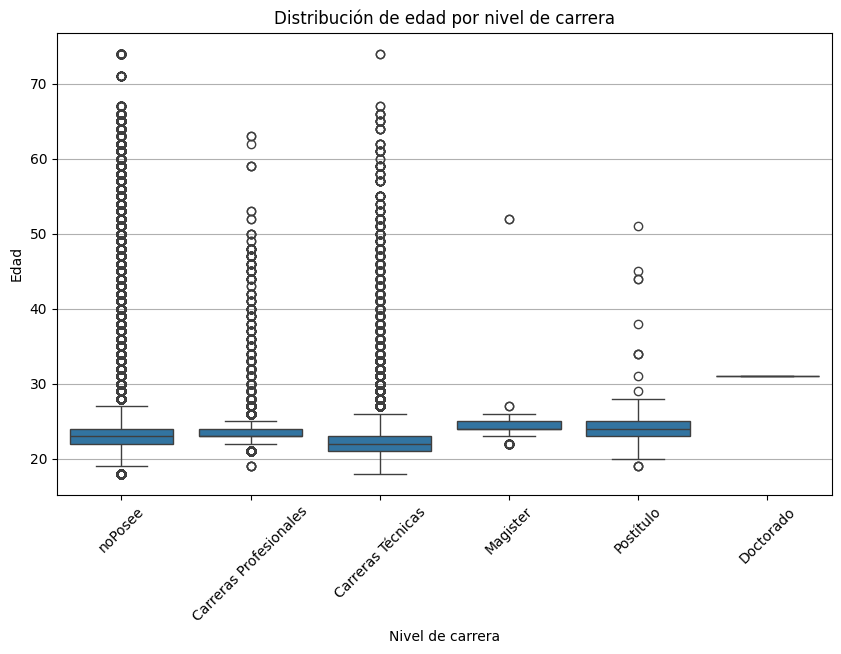

In [ ]:
# VARIABLES NUM√âRICAS
import seaborn as sns
import matplotlib.pyplot as plt

# histograma de Notas
plt.figure(figsize=(8, 5))
sns.histplot(df_final["PROM_NOTAS_ALU"], bins=20, kde=True)
plt.title("Distribuci√≥n del Promedio de Notas")
plt.xlabel("Notas")
plt.ylabel("Frecuencia")
plt.show()

# boxplot de Duraci√≥n Total de Carrera
plt.figure(figsize=(8, 5))
sns.boxplot(x=df_final["dur_total_carr"])
plt.title("Boxplot de Duraci√≥n de Carrera")
plt.xlabel("Semestres")
plt.show()

# gr√°fico de barras para G√©nero
plt.figure(figsize=(6, 4))
sns.countplot(x=df_final["gen_alu"])
plt.title("Distribuci√≥n de G√©nero")
plt.xlabel("G√©nero (1: Hombre, 2: Mujer)")
plt.ylabel("Frecuencia")
plt.show()

# boxplot de distribuci√≥n de edad por nivel de carrera
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_final, x='nivel_carrera_2', y='edad_2022')
plt.title('Distribuci√≥n de edad por nivel de carrera')
plt.xlabel('Nivel de carrera')
plt.ylabel('Edad')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

**Interpretaci√≥n  resultados:**

*  Las notas tienen distribuci√≥n sesgada hacia la izquierda (hay m√°s estudiantes con notas altas que bajas). La mayor√≠a de los estudiantes se encuentra en el rango entre 4.0 y 7.0, con un pico alrededor de 5.5. Aunque en menor proporci√≥n, tambi√©n hay estudiantes con promedios entre 1.5 y 3.0, lo que indica la existencia de un grupo con bajo rendimiento acad√©mico, reflejando una cierta deficiencia en ese segmento.

*   Mayor concentraci√≥n de datos en 0 semestres (la gran mayor√≠a de los estudiantes no completaron una carrera, espec√≠ficamente 5317294 de 5564049, es decir, solo 246755 completaron al menos una carrera), adem√°s se observa cierta variabilidad en la  duraci√≥n de carreras para los que s√≠ completaron una carrera.

*   Las carreras profesionales y t√©cnicas concentran estudiantes entre los 22 y 23 a√±os, pero con alta dispersi√≥n, lo que indica la presencia de personas mayores estudiando. Mag√≠ster, post√≠tulo y doctorado presentan edades m√°s elevadas, como es esperable. El grupo "no posee" tiene una edad constante cercana a los 23 a√±os debido a la imputaci√≥n de valores nulos con la mediana de quienes s√≠ estudiaron, por lo que no refleja una distribuci√≥n real.




**Conclusiones de hip√≥tesis 1:**

*   Existe una mayor tendencia de g√©nero femenino en educaci√≥n superior por diferencia respecto a los hombres, por lo tanto se rechaza la **hip√≥tesis**.


2.   PARA VARIABLES CATEGORICAS

ver qu√© categor√≠as tienen m√°s representaci√≥n y posibles sesgos:

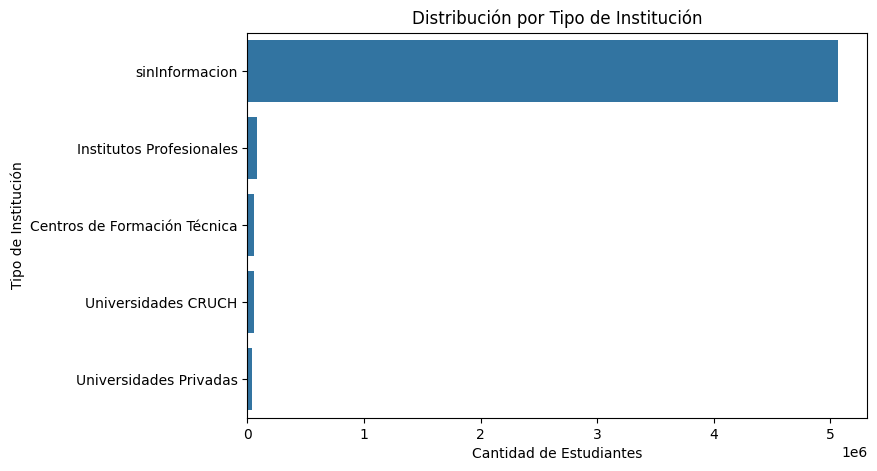

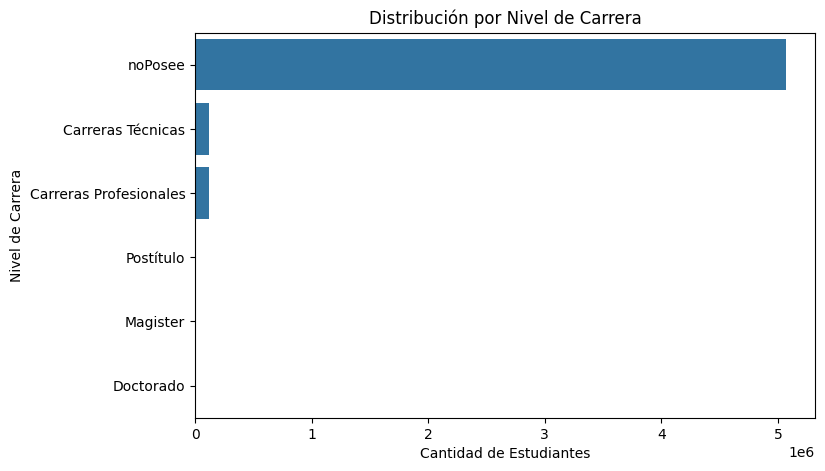

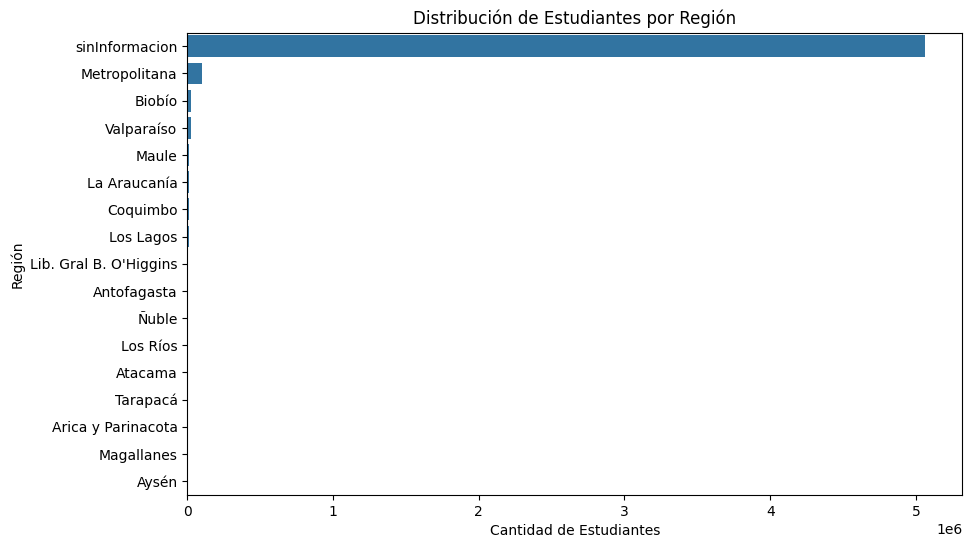

In [ ]:
# VARIABLES CATEGORICAS
# distribuci√≥n de tipo de instituci√≥n
plt.figure(figsize=(8, 5))
sns.countplot(y=df_final["tipo_inst_2"], order=df_final["tipo_inst_2"].value_counts().index)
plt.title("Distribuci√≥n por Tipo de Instituci√≥n")
plt.xlabel("Cantidad de Estudiantes")
plt.ylabel("Tipo de Instituci√≥n")
plt.show()

# distribuci√≥n de nivel de carrera
plt.figure(figsize=(8, 5))
sns.countplot(y=df_final["nivel_carrera_2"], order=df_final["nivel_carrera_2"].value_counts().index)
plt.title("Distribuci√≥n por Nivel de Carrera")
plt.xlabel("Cantidad de Estudiantes")
plt.ylabel("Nivel de Carrera")
plt.show()

# distribuci√≥n por regi√≥n
plt.figure(figsize=(10, 6))
sns.countplot(y=df_final["region_sede"], order=df_final["region_sede"].value_counts().index)
plt.title("Distribuci√≥n de Estudiantes por Regi√≥n")
plt.xlabel("Cantidad de Estudiantes")
plt.ylabel("Regi√≥n")
plt.show()

**Interpretaci√≥n  resultados:**

*   Mayor registro de estudiantes sin informaci√≥n en tipo de instituci√≥n, lo que indica que la gran mayor√≠a de estudiantes no ingresaron a educaci√≥n superior (categor√≠a dominante en el df, lo que puede afectar el modelo -> balancear). Los institutos profesionales son los segundos tipos de instituci√≥n mas preferidos por los estudiantes, aunque en much√≠simo menor n√∫mero.
*   Mayor registro de estudiantes sin una carrera completa al a√±o 2022. Los segundos niveles de carrera m√°s registrados, aunque en mucho menor n√∫mero, fueron Carreras t√©cnicas y Profesionales.
*   Nuevamente mayor registro de estudiantes sin informaci√≥n sobre su regi√≥n de estudio en educaci√≥n superior, debido a las mismas razones mencionadas anteriormente. La Regi√≥n Metropolitana tiene el mayor n√∫mero de estudiantes, mientras que Arica y Parinacota, Magallanes y Ays√©n tienen una menor cantidad de estudiantes, lo que podr√≠a deberse a menos instituciones educativas o menor acceso a educaci√≥n superior.




**Conclusiones de hip√≥tesis 2:**

*  Las personas sin ningun tipo de grado universitario superan de una manera abrubpta a los estudiantes titulados en el 2022 (superando con facilidad los 5 millones **considerando que el total son cerca de 5 millones y 600 mil**).






3.   CORRELACIONES ENTRE VARIABLES

ver qu√© variables tienen mayor relaci√≥n con la educaci√≥n superior.

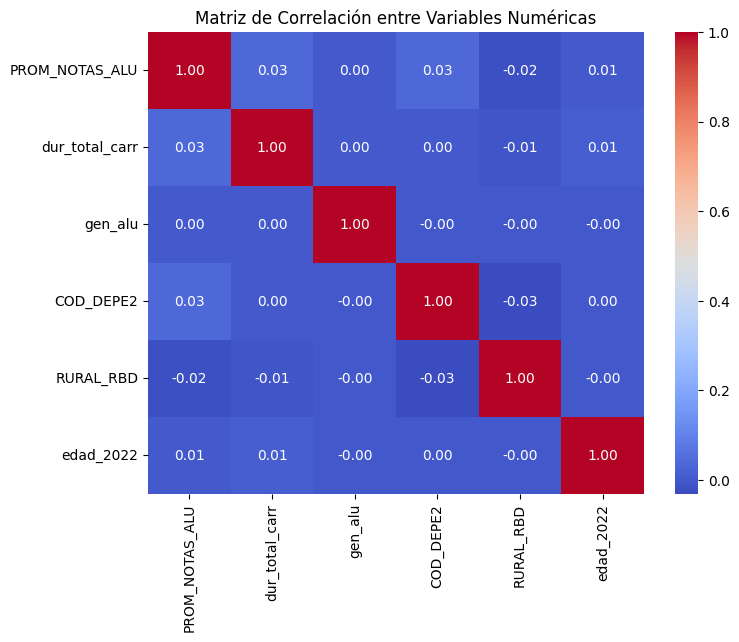

In [ ]:
# Matriz de correlaci√≥n de variables num√©ricas
corr_matrix = df_final[["PROM_NOTAS_ALU", "dur_total_carr", "gen_alu", "COD_DEPE2", "RURAL_RBD",'edad_2022']].corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriz de Correlaci√≥n entre Variables Num√©ricas")
plt.show()

**Interpretaci√≥n  resultados:**

*   Todas las correlaciones observadas son muy bajas, lo que indica que no existen relaciones lineales fuertes entre las variables. La √∫nica excepci√≥n es la ligera correlaci√≥n entre el c√≥digo de dependencia y el promedio de notas, as√≠ como entre este √∫ltimo y la duraci√≥n total de la carrera (0.03). Sin embargo, estos valores siguen siendo demasiado bajos como para considerarse significativos.


**Conclusiones de hip√≥tesis 3:**

* La correlaci√≥n entre edad_2022 y dur_total_carr es muy d√©bil (0.01), lo que sugiere que no hay evidencia significativa de que los estudiantes de mayor edad tiendan a cursar carreras de mayor duraci√≥n, por lo que se rechaza la hip√≥tesis.





#2.2) GR√ÅFICOS CON ESTUDIANTES QUE POSEEN AL MENOS UNA CARRERA

In [ ]:
# Filtrar estudiantes que poseen una carrera de aquellos que no
df_filtrado = df_final[df_final["nivel_carrera_2"] != "noPosee"]

**Hip√≥tesis 1:** Los estudiantes con alguna carrera poseen un promedio de notas mayor.

**Hip√≥tesis 2:** Existen m√°s estudiantes con t√≠tulos profesionales que t√©cnicos.

**Hip√≥tesis 3:** Los estudiantes con mejor rendimiento acad√©mico terminan antes sus estudios.


1.   PARA VARIABLES NUM√âRICAS

ver c√≥mo est√°n distribuidos los nuevos valores filtrados en notas, duraci√≥n de estudios y g√©nero:

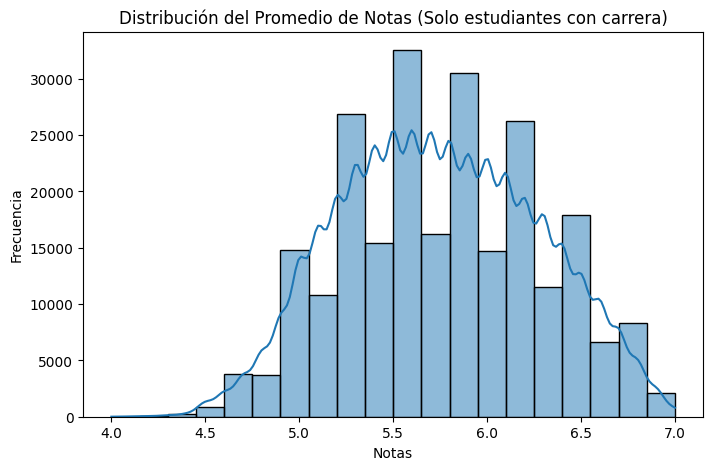

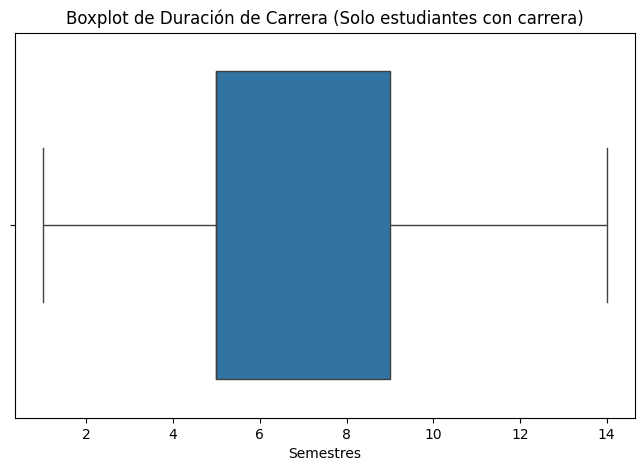

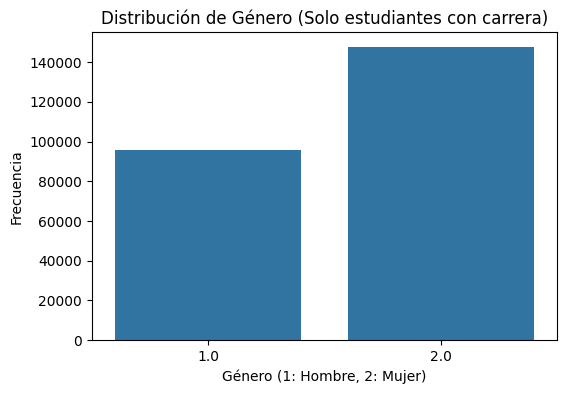

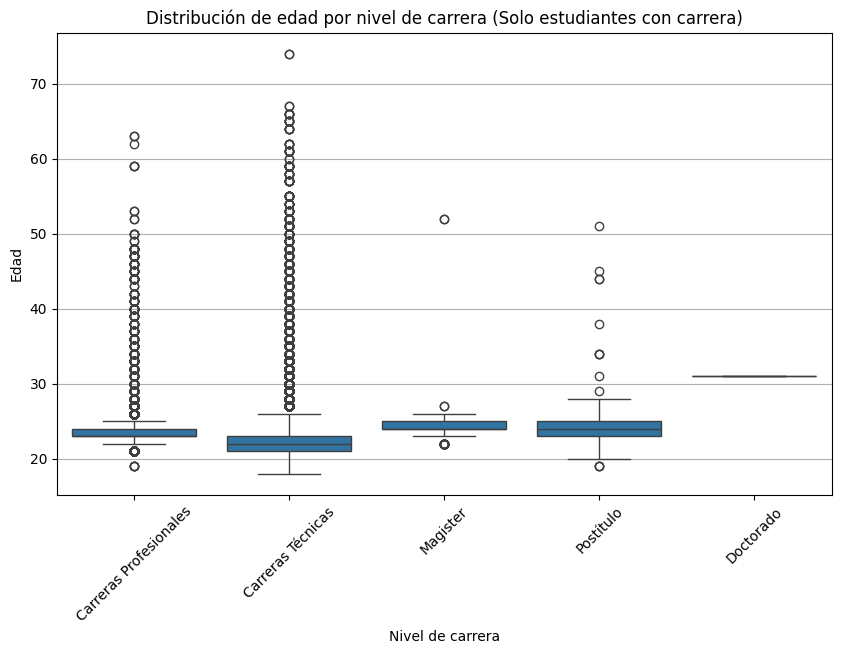

In [ ]:
# VARIABLES NUM√âRICAS
import seaborn as sns
import matplotlib.pyplot as plt

# histograma de Notas
plt.figure(figsize=(8, 5))
sns.histplot(df_filtrado["PROM_NOTAS_ALU"], bins=20, kde=True)
plt.title("Distribuci√≥n del Promedio de Notas (Solo estudiantes con carrera)")
plt.xlabel("Notas")
plt.ylabel("Frecuencia")
plt.show()

# boxplot de Duraci√≥n Total de Carrera
plt.figure(figsize=(8, 5))
sns.boxplot(x=df_filtrado["dur_total_carr"])
plt.title("Boxplot de Duraci√≥n de Carrera (Solo estudiantes con carrera)")
plt.xlabel("Semestres")
plt.show()

# gr√°fico de barras para G√©nero
plt.figure(figsize=(6, 4))
sns.countplot(x=df_filtrado["gen_alu"])
plt.title("Distribuci√≥n de G√©nero (Solo estudiantes con carrera)")
plt.xlabel("G√©nero (1: Hombre, 2: Mujer)")
plt.ylabel("Frecuencia")
plt.show()

# boxplot de distribuci√≥n de edad por nivel de carrera
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_filtrado, x='nivel_carrera_2', y='edad_2022')
plt.title('Distribuci√≥n de edad por nivel de carrera (Solo estudiantes con carrera)')
plt.xlabel('Nivel de carrera')
plt.ylabel('Edad')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

**Interpretaci√≥n resultados:**

*   La mayor√≠a de estudiantes tienen un promedio de notas entre 5.0 y 6.0, con un pico en 5.5, lo que muestra una mejor√≠a comparada al incluir los promedios de estudiantes que no estudiaron una carrera. Se observa una distribucion levemente sesgada a la izquierda, lo que indica que hay pocos estudiantes con notas extremadamente bajas.


*   La mediana est√° alrededor de 8 semestres (lo que coincide con la duraci√≥n promedio esperada de carreras universitarias), mientras que el rango intercuart√≠lico va de 6 a 10 semestres, indicando que la mayor√≠a de los estudiantes completaron sus estudios dentro de ese tiempo.

*   Nuevamente se observa una mayor√≠a de estudiantes del genero femenino, pero esta vez m√°s estable en comparaci√≥n a los resultados obtenidos incluyendo estudiantes que no completaron una carrera.

*   La mayor√≠a de los estudiantes en Carreras Profesionales y T√©cnicas tienen entre 20 y 30 a√±os, con algunos valores at√≠picos que alcanzan los 60 a√±os. Para los mag√≠ster y Postitulo, la concentraci√≥n de edad est√° entre los 25 y 35 a√±os, lo que indica que estos programas suelen atraer personas con experiencia acad√©mica o laboral previa, con valores extremos menos frecuentes. Para Doctorados, La distribuci√≥n es m√°s homog√©nea, centrada en los 30 a√±os, sin valores at√≠picos significativos.


**Conclusiones de hip√≥tesis 1:**

* Los estudiantes que poseen alg√∫n t√≠tulo presentan, en general, promedios de notas m√°s altos que la poblaci√≥n total de egresados de ense√±anza media. La mayor√≠a se concentra entre los 5.0 y 6.0, con un sesgo hacia los valores superiores.

2.   PARA VARIABLES CATEGORICAS

ver qu√© nuevas categor√≠as filtradas tienen m√°s representaci√≥n y posibles sesgos:

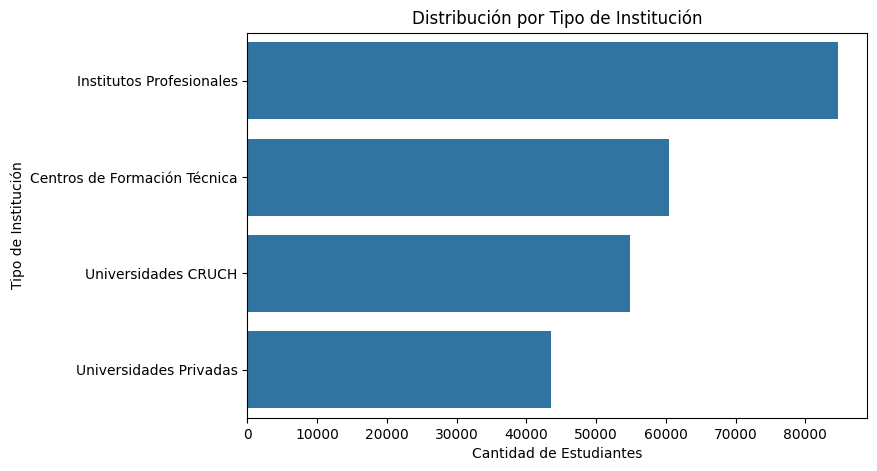

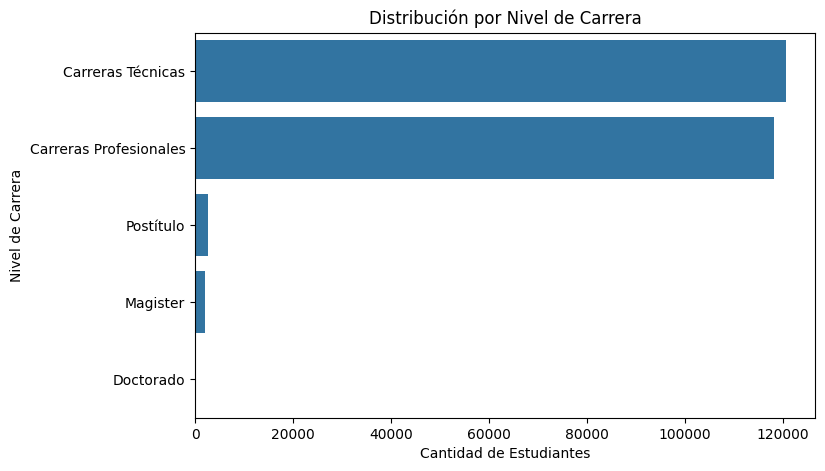

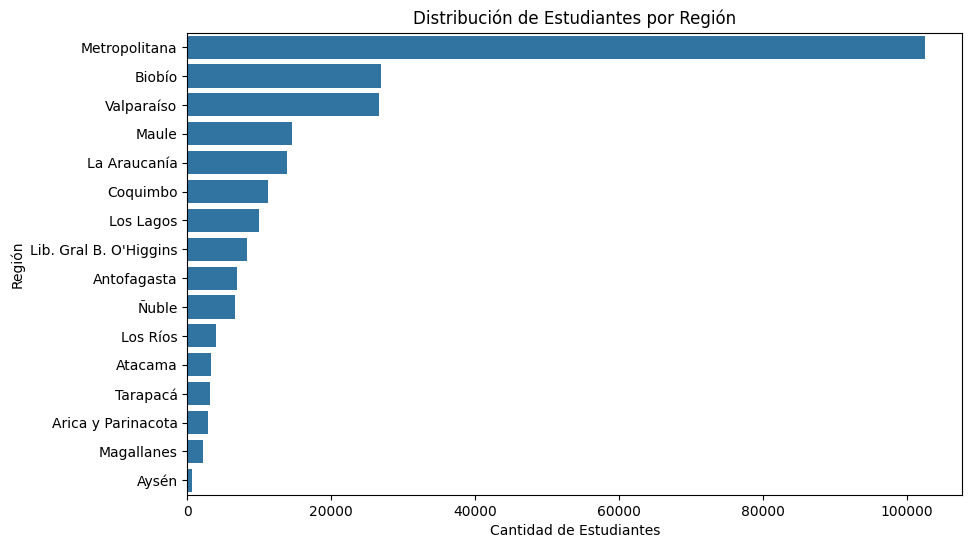

In [ ]:
# VARIABLES CATEGORICAS
# distribuci√≥n de tipo de instituci√≥n
plt.figure(figsize=(8, 5))
sns.countplot(y=df_filtrado["tipo_inst_2"], order=df_filtrado["tipo_inst_2"].value_counts().index)
plt.title("Distribuci√≥n por Tipo de Instituci√≥n")
plt.xlabel("Cantidad de Estudiantes")
plt.ylabel("Tipo de Instituci√≥n")
plt.show()

# distribuci√≥n de nivel de carrera
plt.figure(figsize=(8, 5))
sns.countplot(y=df_filtrado["nivel_carrera_2"], order=df_filtrado["nivel_carrera_2"].value_counts().index)
plt.title("Distribuci√≥n por Nivel de Carrera")
plt.xlabel("Cantidad de Estudiantes")
plt.ylabel("Nivel de Carrera")
plt.show()

# distribuci√≥n por regi√≥n
plt.figure(figsize=(10, 6))
sns.countplot(y=df_filtrado["region_sede"], order=df_filtrado["region_sede"].value_counts().index)
plt.title("Distribuci√≥n de Estudiantes por Regi√≥n")
plt.xlabel("Cantidad de Estudiantes")
plt.ylabel("Regi√≥n")
plt.show()



*   La  mayor√≠a de estudiantes prefieren estudiar en Institutos Profesionales (IP), seguidos por los Centros de Formaci√≥n Tecnica (CFT), a diferencia de completar sus estudios superiores en una Universidad Privada. Esto puede deberse a una combinaci√≥n de factores, incluyendo la deserci√≥n estudiantil, cambios en las preferencias vocacionales, el impacto de la pandemia de COVID-19 (2019) y la influencia de factores socioecon√≥micos como los costos por matr√≠cula.

*   Las Carreras T√©cnicas y Profesionales concentran la mayor cantidad de estudiantes, mientras que los niveles avanzados como Post√≠tulo, Mag√≠ster y Doctorado tienen menor representaci√≥n. Esto sugiere que los estudiantes priorizan opciones m√°s cortas y accesibles econ√≥micamente, ya que cada t√≠tulo adicional implica costos adicionales de matr√≠cula.

* Las regiones con mayor cantidad de estudiantes son la Metropolitana, el Biob√≠o y Valpara√≠so, siendo las m√°s escasas la regi√≥n de Ays√©n y Magallanes. Estas tres primeras coinciden con las regiones con mayor poblaci√≥n a lo largo de Chile, en el mismo orden. Esto demuestra que en estas zonas existe un mejor acceso a la educaci√≥n, mejores condiciones econ√≥micas y mayor demanda laboral. Adem√°s, la migraci√≥n estudiantil puede impactar la distribuci√≥n de titulados en distintas zonas.

**Conclusiones de hip√≥tesis 2:**

* Si bien se observa que hay m√°s estudiantes que egresan de Institutos Profesionales que de Centros de Formaci√≥n T√©cnica, la cantidad de titulados con un grado t√©cnico es mayor. Por lo tanto, se rechaza la hip√≥tesis inicial: en realidad, existe una mayor proporci√≥n de titulados t√©cnicos que profesionales.


3.   CORRELACIONES ENTRE VARIABLES

ver qu√© variables tienen mayor relaci√≥n con la educaci√≥n superior.

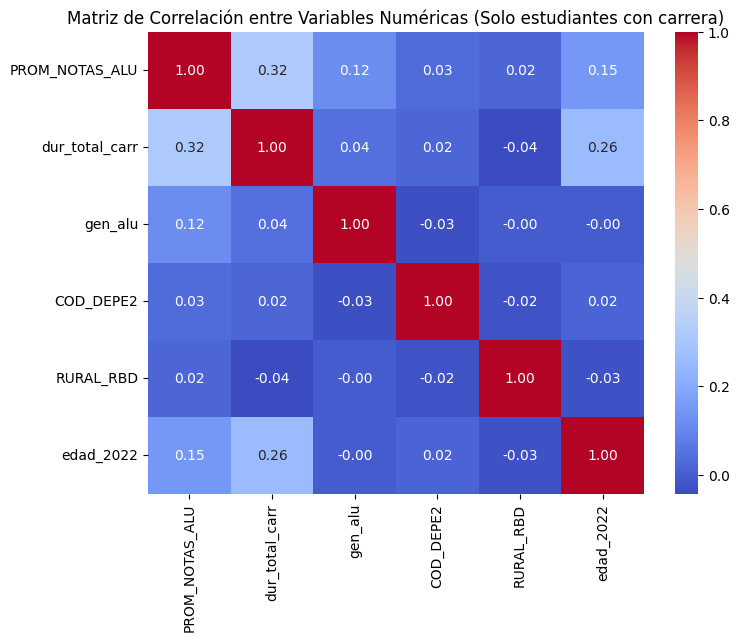

In [ ]:
corr_matrix = df_filtrado[["PROM_NOTAS_ALU", "dur_total_carr", "gen_alu", "COD_DEPE2", "RURAL_RBD",'edad_2022']].corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriz de Correlaci√≥n entre Variables Num√©ricas (Solo estudiantes con carrera)")
plt.show()

**Interpretaci√≥n resultados:**
* Promedio de Notas muestra una correlaci√≥n moderada (0.32) con la duraci√≥n total de la carrera, lo que podr√≠a indicar que los estudiantes con carreras m√°s largas tienden a tener un desempe√±o ligeramente superior.

* Edad tiene una correlaci√≥n positiva con la duraci√≥n de la carrera (0.26), lo que sugiere que los estudiantes mayores tienden a estar en programas m√°s extensos.

* G√©nero muestra una correlaci√≥n baja pero existente con el promedio de notas. Aunque el impacto es leve, podr√≠a indicar tendencias sutiles en el rendimiento acad√©mico.

* Dependencia Educativa y Zona Rural tienen correlaciones d√©biles con otras variables, lo que implica que estos factores no tienen una influencia fuerte en el rendimiento acad√©mico

**Conclusiones de hip√≥tesis 3:**
* La correlaci√≥n entre el promedio de notas y la duraci√≥n total de la carrera es de 0.32, lo que indica una relaci√≥n positiva d√©bil. En lugar de terminar m√°s r√°pido, los estudiantes con mejor promedio tienden a estar un poco m√°s tiempo en la carrera.




---

# Para una mejor entrenamiento y testeo, hemos decidio convertir las variables categ√≥ricas a num√©ricas.

In [ ]:
df_final.head()

mrun  gen_alu  edad_2022  PROM_NOTAS_ALU  COD_DEPE2  RURAL_RBD  \
0    17      2.0       59.0             6.0          4          0   
1    18      2.0       23.0             5.6          5          0   
2    19      2.0       21.0             5.2          2          0   
3    20      1.0       21.0             4.7          2          0   
4    35      2.0       23.0             6.2          1          0   

   ENSE_COMPLETA     tipo_inst_2 nivel_carrera_2  dur_total_carr  \
0              1  sinInformacion         noPosee             0.0   
1              1  sinInformacion         noPosee             0.0   
2              1  sinInformacion         noPosee             0.0   
3              1  sinInformacion         noPosee             0.0   
4              1  sinInformacion         noPosee             0.0   

  area_cineunesco     region_sede  
0  sinInformacion  sinInformacion  
1  sinInformacion  sinInformacion  
2  sinInformacion  sinInformacion  
3  sinInformacion  sinInformacion  
4  sinInformacion  sinInformacion

In [ ]:
# Convertir variables categ√≥ricas a tipo category y luego a num√©rico para ahorar pasos para el modelado
categ_cols = ['nivel_carrera_2','tipo_inst_2','area_cineunesco','region_sede']

df_final.info()

print("üìò Glosario de categor√≠as:\n")
for col in categ_cols:
    cat_col = df_final[col].astype('category')
    print(f"‚ñ∂Ô∏è {col}:")
    for code, label in enumerate(cat_col.cat.categories):
        print(f"   {code} ‚Üí {label}")
    print()

df_final[categ_cols] = df_final[categ_cols].apply(lambda col: col.astype('category').cat.codes)

df_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5308121 entries, 0 to 5564180
Data columns (total 12 columns):
 #   Column           Dtype  
---  ------           -----  
 0   mrun             int64  
 1   gen_alu          float64
 2   edad_2022        float64
 3   PROM_NOTAS_ALU   float64
 4   COD_DEPE2        Int64  
 5   RURAL_RBD        Int64  
 6   ENSE_COMPLETA    int64  
 7   tipo_inst_2      object 
 8   nivel_carrera_2  object 
 9   dur_total_carr   float64
 10  area_cineunesco  object 
 11  region_sede      object 
dtypes: Int64(2), float64(4), int64(2), object(4)
memory usage: 536.6+ MB
üìò Glosario de categor√≠as:

‚ñ∂Ô∏è nivel_carrera_2:
   0 ‚Üí Carreras Profesionales
   1 ‚Üí Carreras T√©cnicas
   2 ‚Üí Doctorado
   3 ‚Üí Magister
   4 ‚Üí Post√≠tulo
   5 ‚Üí noPosee

‚ñ∂Ô∏è tipo_inst_2:
   0 ‚Üí Centros de Formaci√≥n T√©cnica
   1 ‚Üí Institutos Profesionales
   2 ‚Üí Universidades CRUCH
   3 ‚Üí Universidades Privadas
   4 ‚Üí sinInformacion

‚ñ∂Ô∏è area_cineunesco:
   0

<ipython-input-17-a86220b64bcf>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final[categ_cols] = df_final[categ_cols].apply(lambda col: col.astype('category').cat.codes)


In [ ]:
df_final.head()

mrun  gen_alu  edad_2022  PROM_NOTAS_ALU  COD_DEPE2  RURAL_RBD  \
0    17      2.0       59.0             6.0          4          0   
1    18      2.0       23.0             5.6          5          0   
2    19      2.0       21.0             5.2          2          0   
3    20      1.0       21.0             4.7          2          0   
4    35      2.0       23.0             6.2          1          0   

   ENSE_COMPLETA  tipo_inst_2  nivel_carrera_2  dur_total_carr  \
0              1            4                5             0.0   
1              1            4                5             0.0   
2              1            4                5             0.0   
3              1            4                5             0.0   
4              1            4                5             0.0   

   area_cineunesco  region_sede  
0               10           15  
1               10           15  
2               10           15  
3               10           15  
4               10           15

# Entrenamiento y testeo con predicci√≥n a nivel NACIONAL (Balanceado)

Hemos decidido a√±adir una funci√≥n la cual se encarga de emparejar los datos, ya que existe una abrutpa diferencia entre la cantidad de personas que no estudiaron y las que si lo hicieron (en todos los grados juntos) por lo tanto sin tratar de quitar la suficiente informacion y el sesgo cargado hacia las personas que no estudiaron.


* Ahora son 246.755 personas sin estudios , de las 5.317.294 que eran en total antes del balanceo

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from scipy.stats import randint as sp_randint, uniform
import pandas as pd
import numpy as np
import time

# ================================
# CONFIGURACIONES
# ================================
RANDOM_STATE = 42
columnas_categoricas = []

def crear_pipeline(modelo, X):
    numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
    categorical_features = X.select_dtypes(include=['object']).columns
    numeric_transformer = Pipeline(steps=[
        ('scaler', StandardScaler())
    ])
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', numeric_transformer, numeric_features),
            ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
        ]
    )
    return Pipeline([
        ('preprocessor', preprocessor),
        ('classifier', modelo)
    ])

def balancear_df_eficiente(df):
    df_min = df[df['nivel_carrera_2'] != 5]
    df_maj = df[df['nivel_carrera_2'] == 5].sample(len(df_min), random_state=RANDOM_STATE)
    return pd.concat([df_min, df_maj], ignore_index=True)

def medir_tiempo(func):
    def wrapper(*args, **kwargs):
        inicio = time.time()
        resultado = func(*args, **kwargs)
        fin = time.time()
        print(f"Tiempo de ejecuci√≥n: {fin - inicio:.2f} segundos")
        return resultado
    return wrapper

@medir_tiempo
def ajustar_modelo(nombre, modelo, X, y_train, usar_randomsearch=False):
    pipeline = crear_pipeline(modelo, X)
    if usar_randomsearch:
        if nombre == 'DecisionTree':
            param_dist = {
                'classifier__max_depth': [None, 5, 10],
                'classifier__min_samples_split': [2, 5, 10],
                'classifier__min_impurity_decrease': [0, 0.01, 0.1],
                'classifier__class_weight': ['balanced', 'balanced_subsample']
            }
        elif nombre == 'RandomForest':
            param_dist = {
                'classifier__n_estimators': [50, 100, 200],
                'classifier__max_depth': [None, 5, 10],
                'classifier__min_samples_split': [2, 5, 10],
                'classifier__class_weight': ['balanced', 'balanced_subsample']
            }
        elif nombre == 'LinearSVC':
            param_dist = {
                'classifier__C': [0.1, 1, 10],
                'classifier__penalty': ['l2', 'l1'],
                'classifier__loss': ['squared_hinge', 'hinge'],
                'classifier__class_weight': ['balanced', None]
            }
        random_search = RandomizedSearchCV(
            pipeline,
            param_dist,
            cv=3,
            n_iter=5,
            scoring='f1_macro',
            random_state=RANDOM_STATE,
            n_jobs=-1
        )
        random_search.fit(X, y_train)
        return random_search.best_estimator_
    pipeline.fit(X, y_train)
    return pipeline

@medir_tiempo
def evaluar_modelo(nombre, modelo, X_test, y_test):
    y_pred = modelo.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, average='macro', zero_division=0)
    rec = recall_score(y_test, y_pred, average='macro', zero_division=0)
    f1 = f1_score(y_test, y_pred, average='macro', zero_division=0)
    print(f"\nüîç Modelo: {nombre}")
    print(f"Accuracy: {acc:.4f}")
    print(f"Precision (macro): {prec:.4f}")
    print(f"Recall (macro): {rec:.4f}")
    print(f"F1-score (macro): {f1:.4f}")
    print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred)}")
    print(f"Classification Report:\n{classification_report(y_test, y_pred, zero_division=0)}")
    return {
        'Modelo': nombre,
        'Accuracy': acc,
        'Precision (macro)': prec,
        'Recall (macro)': rec,
        'F1-score (macro)': f1
    }

@medir_tiempo
def entrenamiento_global(df, modelos_dict, usar_randomsearch=False):
    df_bal = balancear_df_eficiente(df)
    X = df_bal.drop(columns=['nivel_carrera_2'])
    y = df_bal['nivel_carrera_2']
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=RANDOM_STATE
    )

    resultados = []
    fitted_models = {}  # <-- para guardar las pipelines

    for nombre, modelo in modelos_dict.items():
        # entreno y guardo pipeline
        modelo_ajustado = ajustar_modelo(nombre, modelo, X_train, y_train, usar_randomsearch)
        fitted_models[nombre] = modelo_ajustado

        # eval√∫o y guardo m√©tricas
        resultado = evaluar_modelo(nombre, modelo_ajustado, X_test, y_test)
        resultados.append(resultado)

    df_resultados = pd.DataFrame(resultados).sort_values(
        by='F1-score (macro)', ascending=False
    ).reset_index(drop=True)

    print("\nüìä Comparaci√≥n de modelos global:")
    print(df_resultados)

    # <-- devuelvo AMBOS
    return df_resultados, fitted_models

# ================================
# USO DEL SCRIPT
# ================================
modelos = {
    'DecisionTree': DecisionTreeClassifier(
        random_state=RANDOM_STATE,
        max_depth=10,
        min_samples_split=5,
        min_samples_leaf=2,
        class_weight='balanced'
    ),
    'RandomForest': RandomForestClassifier(
        n_estimators=200,
        max_depth=15,
        min_samples_split=5,
        min_samples_leaf=2,
        class_weight='balanced_subsample',
        random_state=RANDOM_STATE,
        n_jobs=-1
    ),
    'LinearSVC': LinearSVC(
        penalty='l2',
        loss='squared_hinge',
        dual=True,
        tol=0.0001,
        C=1.0,
        multi_class='ovr',
        fit_intercept=True,
        intercept_scaling=1,
        class_weight=None,
        verbose=2,
        random_state=RANDOM_STATE,
        max_iter=1000
    )
}

# Entrenamiento global con b√∫squeda aleatoria activada
df_res_global, modelos_ajustados = entrenamiento_global(df_final, modelos, usar_randomsearch=True)

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=3.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
9 fits failed out of a total of 15.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
9 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1389, in wrapper
    return fit_method(estimator, *args,

Tiempo de ejecuci√≥n: 13.81 segundos

üîç Modelo: DecisionTree
Accuracy: 0.9843
Precision (macro): 0.7602
Recall (macro): 0.9131
F1-score (macro): 0.8093
Confusion Matrix:
[[22988   405   113   107     0]
 [   12 23348   426   292     0]
 [    0     6   351    70     0]
 [    0    11    89   401     0]
 [    0     0     0     0 48731]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.97      0.99     23613
           1       0.98      0.97      0.98     24078
           3       0.36      0.82      0.50       427
           4       0.46      0.80      0.58       501
           5       1.00      1.00      1.00     48731

    accuracy                           0.98     97350
   macro avg       0.76      0.91      0.81     97350
weighted avg       0.99      0.98      0.99     97350

Tiempo de ejecuci√≥n: 0.27 segundos


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=3.
  warnings.warn(


Tiempo de ejecuci√≥n: 301.69 segundos

üîç Modelo: RandomForest
Accuracy: 0.9843
Precision (macro): 0.7584
Recall (macro): 0.9021
F1-score (macro): 0.8060
Confusion Matrix:
[[22981   417    62   153     0]
 [    9 23384   310   375     0]
 [    0     6   321   100     0]
 [    0    16    77   408     0]
 [    0     0     0     0 48731]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.97      0.99     23613
           1       0.98      0.97      0.98     24078
           3       0.42      0.75      0.54       427
           4       0.39      0.81      0.53       501
           5       1.00      1.00      1.00     48731

    accuracy                           0.98     97350
   macro avg       0.76      0.90      0.81     97350
weighted avg       0.99      0.98      0.99     97350

Tiempo de ejecuci√≥n: 0.80 segundos


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=3.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
3 fits failed out of a total of 15.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
3 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1389, in wrapper
    return fit_method(estimator, *args,

[LibLinear]

/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Tiempo de ejecuci√≥n: 3024.85 segundos

üîç Modelo: LinearSVC
Accuracy: 0.9743
Precision (macro): 0.6928
Recall (macro): 0.7904
F1-score (macro): 0.7203
Confusion Matrix:
[[23161   318    69    65     0]
 [  506 22480   728   364     0]
 [    0    76   259    92     0]
 [    0   140   145   216     0]
 [    0     0     0     0 48731]]
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98     23613
           1       0.98      0.93      0.95     24078
           3       0.22      0.61      0.32       427
           4       0.29      0.43      0.35       501
           5       1.00      1.00      1.00     48731

    accuracy                           0.97     97350
   macro avg       0.69      0.79      0.72     97350
weighted avg       0.98      0.97      0.98     97350

Tiempo de ejecuci√≥n: 0.30 segundos

üìä Comparaci√≥n de modelos global:
         Modelo  Accuracy  Precision (macro)  Recall (macro)  F1-score (macr

**Conclusiones generales de los modelos en la predicci√≥n de grados universitarios (evaluaci√≥n global):**
* El modelo que mejor rendimiento mostr√≥ fue **DecisionTree**, ya que obtuvo la mejor combinaci√≥n de m√©tricas: una accuracy del 98.42%, una precisi√≥n macro del 76.02%, recall macro de 91.31% y un F1-score macro de 80.93%. Esto indica que predijo bastante bien las diferentes clases y mantuvo un buen equilibrio entre precisi√≥n y cobertura.

* Muy cerca estuvo **RandomForest**, que tuvo una accuracy apenas superior (98.43%), pero con m√©tricas un poco m√°s bajas en precisi√≥n, recall y F1-score. En general, tambi√©n fue muy efectivo, pero el √°rbol de decisi√≥n tuvo un desempe√±o m√°s balanceado.

* Por √∫ltimo, **LinearSVC** fue el que m√°s tard√≥ en ejecutarse y tambi√©n el que tuvo peores resultados. Su accuracy fue de 97.43%, y sus m√©tricas macro (precisi√≥n: 69.28%, F1: 72.03%) muestran que le cost√≥ m√°s distinguir bien entre clases.

#Testeo por regiones


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

@medir_tiempo
def evaluar_por_region(df, modelos_ajustados, feature_cols=None, target_col='nivel_carrera_2'):
    resultados = []

    # determinar columnas de caracter√≠sticas
    if feature_cols is None:
        feature_cols = [c for c in df.columns if c not in (target_col, 'region_sede')]

    for region in df['region_sede'].unique():
        df_reg = df[df['region_sede'] == region]
        if df_reg.empty:
            continue

        X_reg = df_reg[feature_cols]
        y_true = df_reg[target_col]

        for nombre, modelo in modelos_ajustados.items():
            y_pred = modelo.predict(X_reg)

            acc  = accuracy_score(y_true, y_pred)
            prec = precision_score(y_true, y_pred, average='macro', zero_division=0)
            rec  = recall_score(y_true, y_pred, average='macro', zero_division=0)
            f1   = f1_score(y_true, y_pred, average='macro', zero_division=0)

            resultados.append({
                'Regi√≥n': region,
                'Modelo': nombre,
                'Accuracy': acc,
                'Precision (macro)': prec,
                'Recall (macro)': rec,
                'F1-score (macro)': f1
            })

    df_res = (
        pd.DataFrame(resultados)
          .sort_values(['Regi√≥n', 'F1-score (macro)'], ascending=[True, False])
          .reset_index(drop=True)
    )
    print("\nüìä Resultados por regi√≥n:")
    print(df_res)
    return df_res

df_res_region = evaluar_por_region(df_final, modelos_ajustados)


üìä Resultados por regi√≥n:
    Regi√≥n        Modelo  Accuracy  Precision (macro)  Recall (macro)  \
0        0  RandomForest  0.969063           0.503522        0.734671   
1        0  DecisionTree  0.955556           0.503306        0.728940   
2        0     LinearSVC  0.955410           0.498891        0.646090   
3        1  RandomForest  0.971201           0.498637        0.486582   
4        1  DecisionTree  0.969466           0.498030        0.485850   
5        1     LinearSVC  0.942054           0.495844        0.474273   
6        2  RandomForest  0.969041           0.510114        0.734048   
7        2  DecisionTree  0.956417           0.505145        0.729934   
8        2     LinearSVC  0.904418           0.458657        0.463182   
9        3  DecisionTree  0.945865           0.499069        0.469819   
10       3  RandomForest  0.939850           0.500000        0.468046   
11       3     LinearSVC  0.885714           0.483994        0.452088   
12       4  Decision

**Conclusiones de el testeo en regiones:**

* **RandomForest** fue el modelo con mejor rendimiento en la mayor√≠a de las regiones: se impuso en 9 de las 17 (sin contar la categor√≠a "sinInformaci√≥n"). Destac√≥ sobre todo en regiones del sur y m√°s rurales, como La Araucan√≠a, Los Lagos, Los R√≠os, y √ëuble, donde logr√≥ buenos niveles de precisi√≥n y recall incluso con el desbalance de clases.

* **DecisionTree** lider√≥ en 7 regiones. Fue especialmente efectivo en zonas donde los datos est√°n m√°s desbalanceados o hay menos muestras, como Ays√©n, Atacama, Maule o Valpara√≠so. Su desempe√±o fue bastante parejo, aunque en algunas regiones qued√≥ muy cerca del RandomForest.

* **LinearSVC** por otro lado, no logr√≥ ser el mejor modelo en ninguna regi√≥n. Si bien en algunas zonas tuvo buenos niveles de accuracy, sus m√©tricas de recall y F1-score fueron consistentemente m√°s bajas que los modelos basados en √°rboles.

* En la categor√≠a ‚ÄúsinInformaci√≥n‚Äù tanto **RandomForest** como **DecisionTree** obtuvieron un rendimiento perfecto, con todas las m√©tricas en 1.0. Esto probablemente se debe a que los datos en esa categor√≠a son muy homog√©neos o directamente f√°ciles de clasificar.

---

**Modelo con mejor desempe√±o general: RandomForest.**

Aunque DecisionTree mostr√≥ un buen desempe√±o en la evaluaci√≥n global, RandomForest demostr√≥ un comportamiento superior al analizar los datos con mayor granularidad (por regi√≥n). Este destac√≥ por obtener el mayor F1-score en la mayor√≠a de las regiones (9 de 17 con datos balanceados) y por mantener un rendimiento consistente incluso en contextos con desbalance de clases. Esta mayor capacidad de generalizaci√≥n frente a DecisionTree y LinearSVC, tanto en regiones con alta como baja cantidad de muestras, lo posiciona como el modelo m√°s recomendable para problemas como este.